## work_1116,7
- csv 파일 불러와서 결함 찾기
- 각 결함 유형별 어떤 센서 특징과 표면 특징을 가지는지
- 센서 값만으로 결함 유형 예측 가능한지
- 공정 개선 제안 1개 이상

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [114]:
df = pd.read_csv('../DATA/smart_quality_inspection_dataset.csv')
df.info() #결측치는 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HOG_F1       1854 non-null   float64
 1   HOG_F2       1854 non-null   float64
 2   HOG_F3       1854 non-null   float64
 3   HOG_F4       1854 non-null   float64
 4   HOG_F5       1854 non-null   float64
 5   HOG_F6       1854 non-null   float64
 6   HOG_F7       1854 non-null   float64
 7   HOG_F8       1854 non-null   float64
 8   HOG_F9       1854 non-null   float64
 9   HOG_F10      1854 non-null   float64
 10  Temperature  1854 non-null   float64
 11  Vibration    1854 non-null   float64
 12  Acoustic     1854 non-null   float64
 13  Fault_Type   1854 non-null   object 
dtypes: float64(13), object(1)
memory usage: 202.9+ KB


In [115]:
df

,HOG_F1,HOG_F2,HOG_F3,HOG_F4,HOG_F5,HOG_F6,HOG_F7,HOG_F8,HOG_F9,HOG_F10,Temperature,Vibration,Acoustic,Fault_Type
0,0.046846,0.747276,-0.115297,-0.920363,-1.195644,-0.953782,-1.143734,2.891212,-0.877729,-0.038431,63.621048,0.705596,52.986256,Surface Crack
1,-0.086770,1.413315,0.429374,0.424495,0.174386,0.275093,0.322255,-0.627408,-0.917360,0.058642,58.142729,3.463638,49.447204,No Fault
2,-0.536923,0.184367,-1.079265,-1.473758,-1.279324,-0.073878,-1.615569,1.949660,1.952232,0.885493,57.099583,5.502285,23.220863,No Fault
3,-0.369409,-0.483601,0.296536,0.596621,0.296258,-1.310473,-0.189909,0.533266,-2.361538,-1.105311,70.307374,6.750232,44.256296,Overheating
4,0.525870,-0.312140,-0.311123,1.108442,-0.053811,-0.473454,-0.308574,-0.275646,-0.834540,-0.222531,59.947956,5.152318,36.517987,No Fault
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,0.147408,-0.121048,-0.275545,-0.383891,1.133566,0.282000,-1.520501,0.132910,1.517748,-0.461473,49.521390,15.688499,39.238204,Abnormal Vibration
1850,-0.384747,0.631838,-0.855179,-1.180763,-1.564962,0.679784,0.869498,-0.585282,-1.154596,0.870035,56.235505,5.870908,37.967497,No Fault
1851,-0.125707,-2.006921,0.371849,0.291351,1.388480,0.839362,0.895828,-0.877541,-1.352855,0.512570,60.733729,10.721070,33.766704,Abnormal Vibration
1852,0.018464,0.646381,0.125657,1.444634,-0.431179,0.041910,-0.633165,-0.874990,1.324975,-0.113348,55.918872,5.402331,43.694638,No Fault


In [116]:
## 데이터 모음
# 표면 결함
df_su_cr = df[df.Fault_Type == 'Surface Crack']
# 과열
df_ov = df[df.Fault_Type == 'Overheating']
# 이상 진동
df_ab_vi = df[df.Fault_Type == 'Abnormal Vibration']
## 정상 데이터
df_no_prob = df[df.Fault_Type == 'No Fault']

## 출력
display(df)

,HOG_F1,HOG_F2,HOG_F3,HOG_F4,HOG_F5,HOG_F6,HOG_F7,HOG_F8,HOG_F9,HOG_F10,Temperature,Vibration,Acoustic,Fault_Type
0,0.046846,0.747276,-0.115297,-0.920363,-1.195644,-0.953782,-1.143734,2.891212,-0.877729,-0.038431,63.621048,0.705596,52.986256,Surface Crack
1,-0.086770,1.413315,0.429374,0.424495,0.174386,0.275093,0.322255,-0.627408,-0.917360,0.058642,58.142729,3.463638,49.447204,No Fault
2,-0.536923,0.184367,-1.079265,-1.473758,-1.279324,-0.073878,-1.615569,1.949660,1.952232,0.885493,57.099583,5.502285,23.220863,No Fault
3,-0.369409,-0.483601,0.296536,0.596621,0.296258,-1.310473,-0.189909,0.533266,-2.361538,-1.105311,70.307374,6.750232,44.256296,Overheating
4,0.525870,-0.312140,-0.311123,1.108442,-0.053811,-0.473454,-0.308574,-0.275646,-0.834540,-0.222531,59.947956,5.152318,36.517987,No Fault
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,0.147408,-0.121048,-0.275545,-0.383891,1.133566,0.282000,-1.520501,0.132910,1.517748,-0.461473,49.521390,15.688499,39.238204,Abnormal Vibration
1850,-0.384747,0.631838,-0.855179,-1.180763,-1.564962,0.679784,0.869498,-0.585282,-1.154596,0.870035,56.235505,5.870908,37.967497,No Fault
1851,-0.125707,-2.006921,0.371849,0.291351,1.388480,0.839362,0.895828,-0.877541,-1.352855,0.512570,60.733729,10.721070,33.766704,Abnormal Vibration
1852,0.018464,0.646381,0.125657,1.444634,-0.431179,0.041910,-0.633165,-0.874990,1.324975,-0.113348,55.918872,5.402331,43.694638,No Fault


In [117]:
## 결함 고유값 확인
display(df.Fault_Type.unique())

## 컬럼 확인
df.columns

array(['Surface Crack', 'No Fault', 'Overheating', 'Abnormal Vibration'],
      dtype=object)

Index(['HOG_F1', 'HOG_F2', 'HOG_F3', 'HOG_F4', 'HOG_F5', 'HOG_F6', 'HOG_F7',
       'HOG_F8', 'HOG_F9', 'HOG_F10', 'Temperature', 'Vibration', 'Acoustic',
       'Fault_Type'],
      dtype='object')

HOG_F1 ~ HOG_F10 : HOG(Histogram of Oriented Gradients) 기반 피쳐 이미지/표면 패턴 특성을 수치로 변환한 값

Temperature      : 공정 온도 센서 값

Vibration        : 진동 센서 값

Acoustic         : 소음 센서 값

Fault_Type       : 불량 종류 (Surface Crack, Dent, Overheating, No Fault 등)

In [118]:
## 정상 데이터 - 갖가지 확인용
display(df_no_prob.describe())
df_su_cr.describe()

,HOG_F1,HOG_F2,HOG_F3,HOG_F4,HOG_F5,HOG_F6,HOG_F7,HOG_F8,HOG_F9,HOG_F10,Temperature,Vibration,Acoustic
count,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000
mean,-0.019373,0.038939,0.000274,0.016016,0.023759,0.048180,0.003860,-0.002751,0.017976,0.016779,60.220039,4.991408,49.944155
std,1.038574,1.008599,0.972836,1.004790,0.995015,0.968103,0.992414,0.964164,1.011099,0.965281,10.081612,2.026204,14.973143
min,-3.404486,-3.342404,-2.840843,-2.653904,-2.810868,-2.933734,-2.952630,-3.967711,-4.186148,-3.029159,31.703177,-0.814874,3.888350
25%,-0.730143,-0.600048,-0.711780,-0.721835,-0.679538,-0.579951,-0.702001,-0.661687,-0.677423,-0.622908,53.033681,3.656267,38.962375
50%,-0.014458,0.012448,0.012833,0.033274,0.040428,-0.000634,0.010200,0.026648,0.072586,0.031482,60.100460,4.910307,50.028901
75%,0.689601,0.666245,0.666464,0.744658,0.643921,0.712592,0.734257,0.650400,0.702389,0.654929,67.358995,6.370159,60.095586
max,2.715897,2.418767,3.345475,2.486810,3.017754,2.855522,3.470367,2.869729,2.884721,2.860297,89.518812,10.772658,92.710608


,HOG_F1,HOG_F2,HOG_F3,HOG_F4,HOG_F5,HOG_F6,HOG_F7,HOG_F8,HOG_F9,HOG_F10,Temperature,Vibration,Acoustic
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,0.045605,-0.041450,0.027222,0.003111,0.009713,0.082125,0.073269,-0.082656,-0.089687,0.043916,59.607205,4.743445,66.476887
std,1.055412,0.966688,1.027673,0.993423,1.012104,0.989361,0.947069,1.017406,1.016394,1.004461,9.568215,1.996434,15.142795
min,-2.480480,-3.196903,-2.910836,-2.612144,-3.106926,-2.521572,-2.337189,-3.619542,-2.954311,-2.715058,35.690674,-0.646636,17.043499
25%,-0.686758,-0.735451,-0.733228,-0.647667,-0.655951,-0.575583,-0.552131,-0.835715,-0.820694,-0.613015,53.096238,3.534086,56.020869
50%,0.001262,-0.042302,0.048299,0.048804,-0.022042,0.046712,0.088320,-0.064599,-0.034593,0.021354,59.505269,4.700389,66.155513
75%,0.784894,0.592421,0.772353,0.670678,0.727202,0.706786,0.669590,0.630604,0.596028,0.718537,66.133399,6.158562,76.774832
max,3.141346,2.100783,3.147866,2.821490,3.409734,2.961660,2.745836,2.891212,2.802209,2.757726,86.482642,9.931702,109.078307


In [119]:
df_no_prob.describe() - df_su_cr.describe() ## 차이가 클수록 뺀 값이 커짐

,HOG_F1,HOG_F2,HOG_F3,HOG_F4,HOG_F5,HOG_F6,HOG_F7,HOG_F8,HOG_F9,HOG_F10,Temperature,Vibration,Acoustic
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,-0.064978,0.080389,-0.026949,0.012904,0.014046,-0.033945,-0.069409,0.079905,0.107663,-0.027137,0.612834,0.247963,-16.532732
std,-0.016839,0.041911,-0.054837,0.011367,-0.017089,-0.021258,0.045345,-0.053241,-0.005295,-0.039180,0.513397,0.029770,-0.169651
min,-0.924007,-0.145502,0.069994,-0.041760,0.296058,-0.412163,-0.615441,-0.348169,-1.231837,-0.314102,-3.987497,-0.168238,-13.155148
25%,-0.043385,0.135404,0.021448,-0.074168,-0.023587,-0.004367,-0.149870,0.174028,0.143270,-0.009894,-0.062557,0.122181,-17.058493
50%,-0.015720,0.054751,-0.035466,-0.015530,0.062470,-0.047346,-0.078120,0.091247,0.107178,0.010128,0.595191,0.209918,-16.126611
75%,-0.095294,0.073824,-0.105889,0.073980,-0.083281,0.005806,0.064667,0.019796,0.106361,-0.063608,1.225596,0.211597,-16.679246
max,-0.425449,0.317984,0.197609,-0.334680,-0.391980,-0.106138,0.724531,-0.021483,0.082512,0.102571,3.036170,0.840955,-16.367700


C:\Users\qjadl\AppData\Local\Temp\ipykernel_23444\2409289498.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


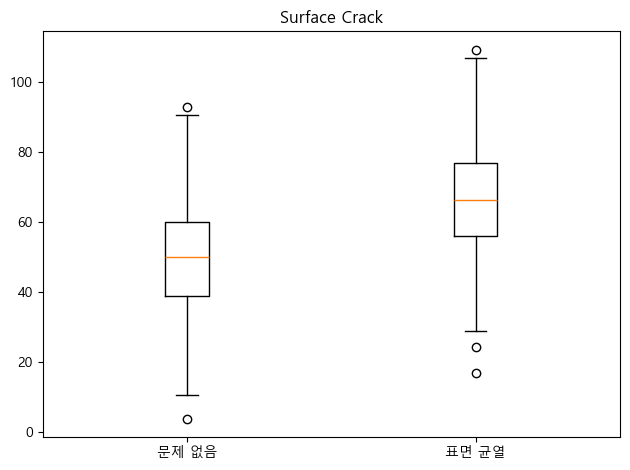

In [120]:
# 정상 - Surface Crack 관계 시각화
# describe로 확인했을 때, 차이가 보이는 부분 시각화
# Acoustic

# 1번 박스플롯: Surface Crack
plt.boxplot(
    [df_no_prob['Acoustic'], df_su_cr['Acoustic']],
    labels=['문제 없음', '표면 균열']
)
plt.title('Surface Crack')


plt.tight_layout()
plt.show()


## -> Temperature 가 가장 변화가 뚜렷함.
## Overheating은 Temperature의 영향이 큰 것으로 보임

In [121]:
df_no_prob.describe() - df_ov.describe() ## 차이가 클수록 뺀 값이 커짐

,HOG_F1,HOG_F2,HOG_F3,HOG_F4,HOG_F5,HOG_F6,HOG_F7,HOG_F8,HOG_F9,HOG_F10,Temperature,Vibration,Acoustic
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,-0.042462,0.033950,-0.058434,0.039364,0.083275,0.048914,-0.058739,-0.011668,-0.062737,0.089283,-30.356805,-0.065406,0.784965
std,0.000708,-0.029004,-0.036488,0.008410,0.047829,-0.020522,0.056374,0.019638,-0.011870,0.025585,-1.991712,0.102001,-0.179691
min,-0.009806,-0.406914,0.423989,0.417085,-0.515630,-0.206119,-0.808660,-1.791671,-1.201223,-0.315381,-25.497174,-0.673164,-9.866968
25%,-0.082611,0.086243,-0.077649,-0.064399,0.074507,0.105015,-0.158346,0.010880,-0.032316,0.115113,-28.766142,-0.079838,0.374464
50%,-0.029443,0.006629,-0.053807,0.058094,0.128695,0.018459,-0.056141,0.013420,0.087206,0.090195,-30.566803,-0.263211,1.029441
75%,-0.003364,0.002390,-0.007446,0.111248,0.110934,0.027841,0.009201,0.037203,-0.083547,0.034047,-31.470225,0.047692,0.431338
max,-0.424174,-0.536393,-0.670103,-0.519770,0.023849,-0.083906,0.944284,0.079497,-1.414137,0.298253,-37.692011,0.364907,-12.601394


C:\Users\qjadl\AppData\Local\Temp\ipykernel_23444\1590538783.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,0].boxplot(
C:\Users\qjadl\AppData\Local\Temp\ipykernel_23444\1590538783.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,1].boxplot(
C:\Users\qjadl\AppData\Local\Temp\ipykernel_23444\1590538783.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(
C:\Users\qjadl\AppData\Local\Temp\ipykernel_23444\1590538783.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped

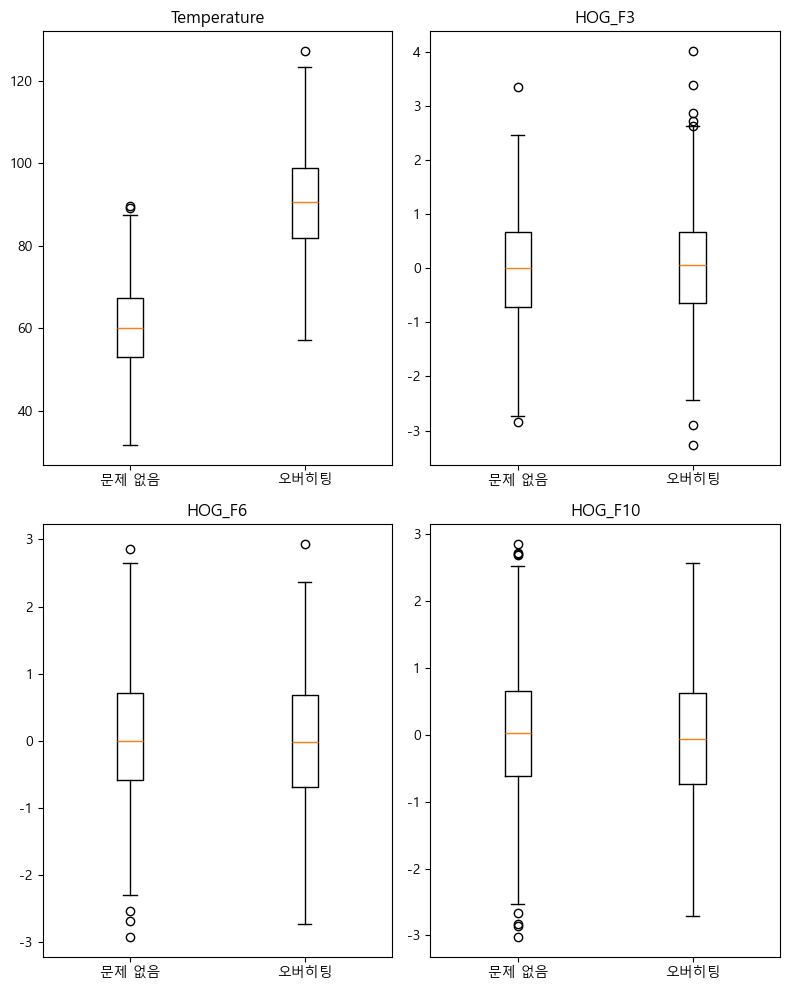

In [122]:
# 정상 - Overheating 관계 시각화
# describe로 확인했을 때, 차이가 보이는 부분 시각화
# Temperature / HOG_F3 / HOG_F6 / HOG_F10
fig, axes = plt.subplots(2, 2, figsize=(8, 10))  # 1행 2열 서브플롯

# 1번 박스플롯: Temperature
axes[0,0].boxplot(
    [df_no_prob['Temperature'], df_ov['Temperature']],
    labels=['문제 없음', '오버히팅']
)
axes[0,0].set_title('Temperature')

# 2번 박스플롯: HOG_F3
axes[0,1].boxplot(
    [df_no_prob['HOG_F3'], df_ov['HOG_F3']],
    labels=['문제 없음', '오버히팅']
)
axes[0,1].set_title('HOG_F3')

# 3번 박스플롯: HOG_F6
axes[1,0].boxplot(
    [df_no_prob['HOG_F6'], df_ov['HOG_F6']],
    labels=['문제 없음', '오버히팅']
)
axes[1,0].set_title('HOG_F6')

# 3번 박스플롯: HOG_F10
axes[1,1].boxplot(
    [df_no_prob['HOG_F10'], df_ov['HOG_F10']],
    labels=['문제 없음', '오버히팅']
)
axes[1,1].set_title('HOG_F10')

plt.tight_layout()
plt.show()


## -> Temperature 가 가장 변화가 뚜렷함.
## Overheating은 Temperature의 영향이 큰 것으로 보임

In [123]:
abs(df_no_prob.describe() - df_ab_vi.describe()) > 1 ## 차이가 클수록 뺀 값이 커짐

,HOG_F1,HOG_F2,HOG_F3,HOG_F4,HOG_F5,HOG_F6,HOG_F7,HOG_F8,HOG_F9,HOG_F10,Temperature,Vibration,Acoustic
count,True,True,True,True,True,True,True,True,True,True,True,True,True
mean,False,False,False,False,False,False,False,False,False,False,False,True,False
std,False,False,False,False,False,False,False,False,False,False,False,False,False
min,False,False,False,False,False,False,False,True,True,False,False,True,True
25%,False,False,False,False,False,False,False,False,False,False,False,True,False
50%,False,False,False,False,False,False,False,False,False,False,False,True,False
75%,False,False,False,False,False,False,False,False,False,False,False,True,False
max,False,False,False,False,False,False,False,False,False,False,True,True,True


C:\Users\qjadl\AppData\Local\Temp\ipykernel_23444\2607131931.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


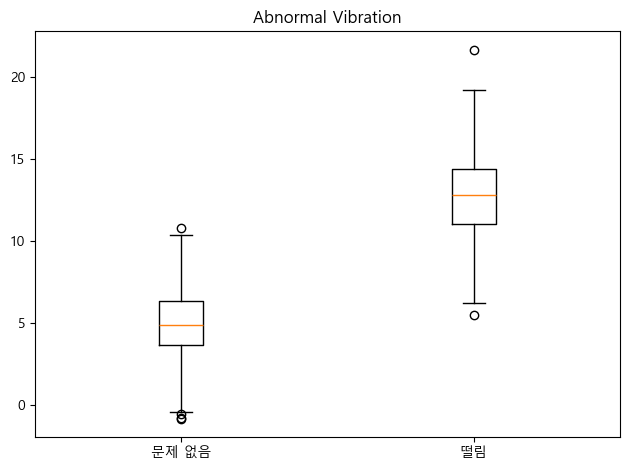

In [124]:
# 정상 - Abnormal Vibration 관계 시각화
# describe로 확인했을 때, 차이가 보이는 부분 시각화
# Vibration

# 1번 박스플롯: Abnormal Vibration
plt.boxplot(
    [df_no_prob['Vibration'], df_ab_vi['Vibration']],
    labels=['문제 없음', '떨림']
)
plt.title('Abnormal Vibration')
plt.tight_layout()
plt.show()


## -> Temperature 가 가장 변화가 뚜렷함.
## Overheating은 Temperature의 영향이 큰 것으로 보임

C:\Users\qjadl\AppData\Local\Temp\ipykernel_23444\3942889342.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,0].boxplot(
C:\Users\qjadl\AppData\Local\Temp\ipykernel_23444\3942889342.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,1].boxplot(
C:\Users\qjadl\AppData\Local\Temp\ipykernel_23444\3942889342.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(


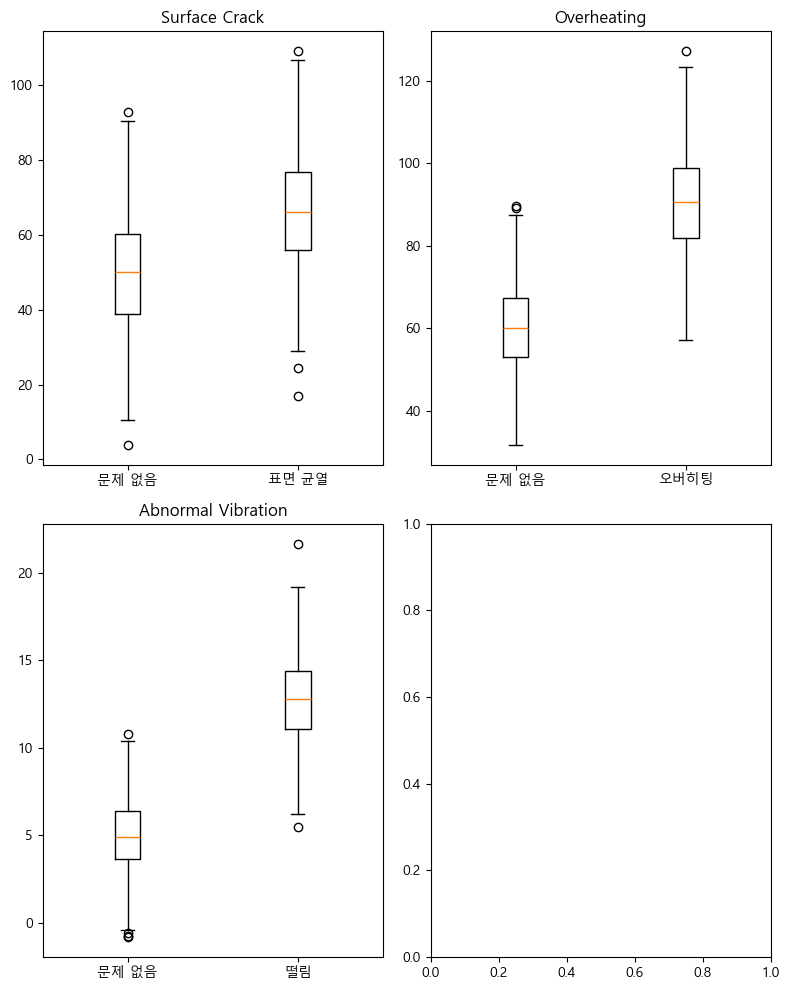

In [125]:
# 모두 한눈에 비교
fig, axes = plt.subplots(2, 2, figsize=(8, 10))  # 1행 2열 서브플롯

# 1번 박스플롯: Surface Crack
axes[0,0].boxplot(
    [df_no_prob['Acoustic'], df_su_cr['Acoustic']],
    labels=['문제 없음', '표면 균열']
)
axes[0,0].set_title('Surface Crack')

# 2번 박스플롯: Overheating
axes[0,1].boxplot(
    [df_no_prob['Temperature'], df_ov['Temperature']],
    labels=['문제 없음', '오버히팅']
)
axes[0,1].set_title('Overheating')


# 3번 박스플롯: Abnormal Vibration
axes[1,0].boxplot(
    [df_no_prob['Vibration'], df_ab_vi['Vibration']],
    labels=['문제 없음', '떨림']
)
axes[1,0].set_title('Abnormal Vibration')


plt.tight_layout()
plt.show()





Overheating은 Temperature의 영향이 큰 것으로 보임 (정상평균보다 20 정도 크게 분포되어있음)

Surface Crack은 Acoustic의 영향이 큰 것으로 보임 (정상평균보다 40도 높게 분포되어있음)

Abnormal Vibration은 Vibration의 영향이 큰 것으로 보임 (정상평균보다 7정도 높게 분포되어있음)

사용할 HOG 컬럼: ['HOG_F1', 'HOG_F2', 'HOG_F3', 'HOG_F4', 'HOG_F5', 'HOG_F6', 'HOG_F7', 'HOG_F8', 'HOG_F9', 'HOG_F10']
결함 종류: ['Surface Crack' 'No Fault' 'Overheating' 'Abnormal Vibration']


C:\Users\qjadl\AppData\Local\Temp\ipykernel_23444\2887659851.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data_to_plot, labels=fault_types)
C:\Users\qjadl\AppData\Local\Temp\ipykernel_23444\2887659851.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data_to_plot, labels=fault_types)
C:\Users\qjadl\AppData\Local\Temp\ipykernel_23444\2887659851.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data_to_plot, labels=fault_types)
C:\Users\qjadl\AppData\Local\Temp\ipykernel_23444\2887659851.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renam

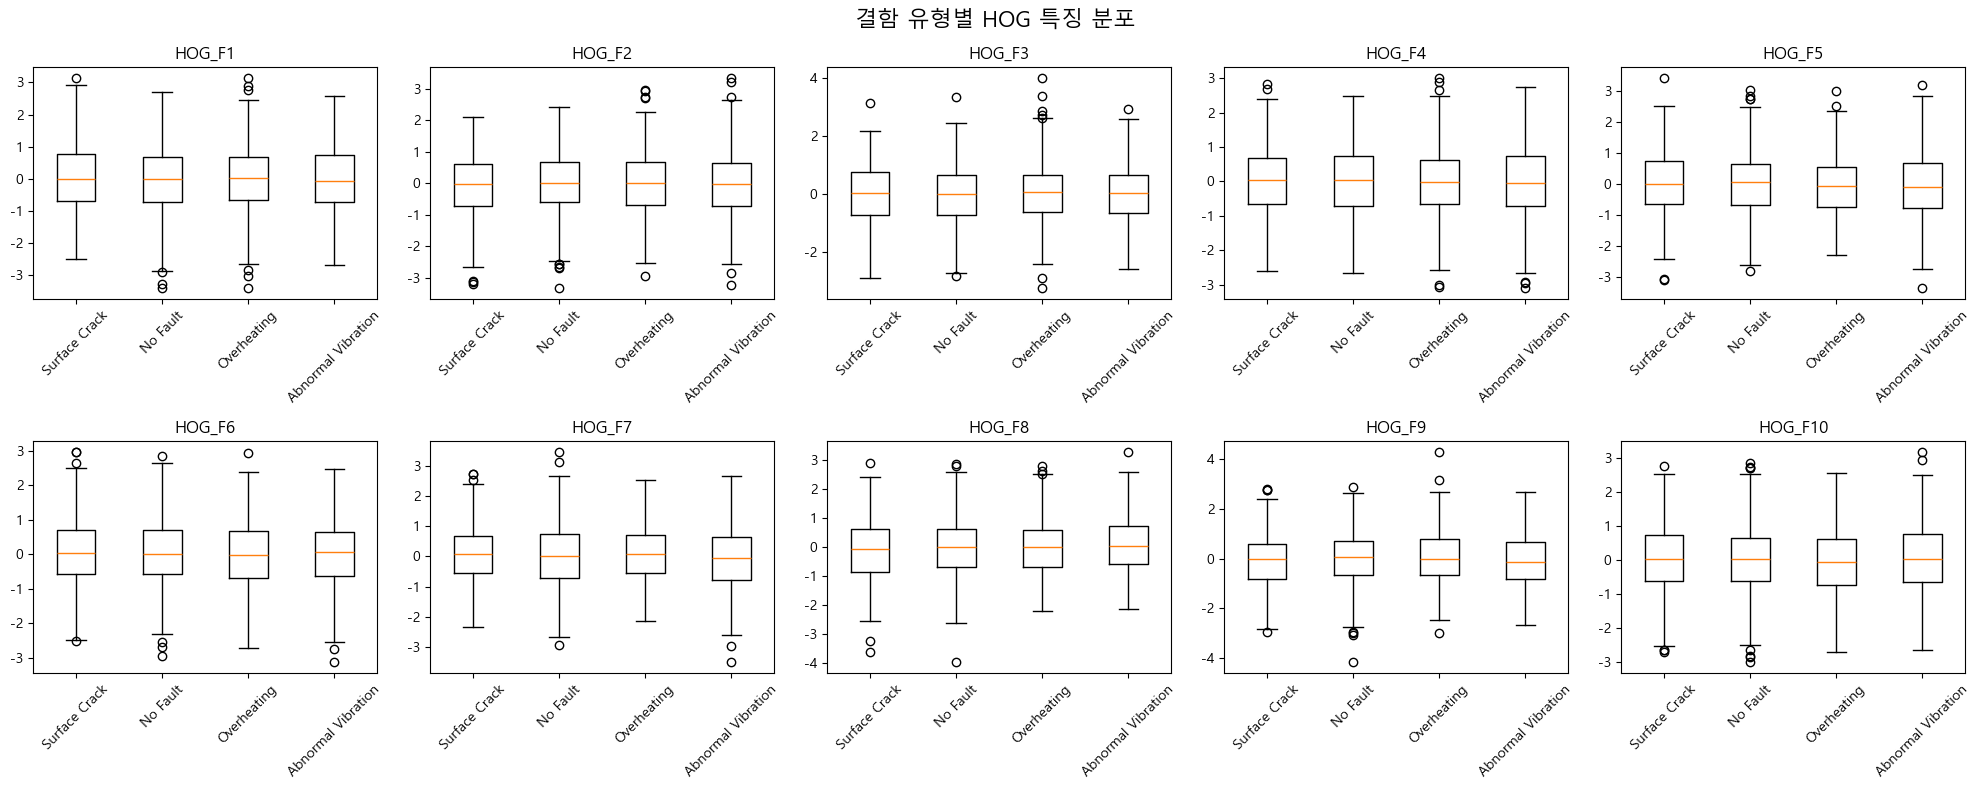

In [126]:
# HOG 컬럼 추출
hog_cols = [c for c in df.columns if c.startswith('HOG_F')]
fault_types = df['Fault_Type'].unique()

print("사용할 HOG 컬럼:", hog_cols)
print("결함 종류:", fault_types)

# 2 x 5 서브플롯 생성
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i, col in enumerate(hog_cols):
    ax = axes[i // 5, i % 5]     # subplot 선택

    data_to_plot = [df[df['Fault_Type'] == ft][col].dropna() for ft in fault_types]

    ax.boxplot(data_to_plot, labels=fault_types)

    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)

fig.suptitle("결함 유형별 HOG 특징 분포", fontsize=16)
plt.tight_layout()
plt.show()


HOG 기반 특징은 표면 기반 결함(Surface Crack, Abnormal Vibration)을 구분하는 데 효과적이며, 공정 조건 불량(Overheating) 구분에는 부적합한 것으로 나타났다.

Surface Crack은 HOG_F1, F3, F7, F9 등에서 양의 방향 특성이 증가하며 Outlier 비율도 높아 표면 균열에 의한 엣지 방향 변화가 뚜렷하게 드러남.

Abnormal Vibration은 여러 HOG 특징이 음의 방향으로 치우쳐 패턴이 흐려지는 양상으로 구분됨.

Overheating은 HOG 분포가 정상과 거의 동일해, HOG보다 Temperature 센서를 활용한 분류가 더 적합한것으로 판단.

따라서 본 특징 분석 결과, HOG는 주로 표면 결함의 탐지·분류에 적합한 특징 공간임을 확인할 수 있다.

<hr>
카메라/조명을 표준화하는 개선을 생각해 보았습니다. 이유는 다음과 같습니다.

HOG는 엣지/명암 변화에 민감하다는 사실을 조사를 통해 알 수 있었습니다. 

따라서 촬영 위치, 조명 세기, 각도 등을 일관적으로 유지해서 오차를 줄일 수 있도록 고정하면 일정한 값을 얻을 수 있을 거 같습니다.

정리하면 다음과 같습니다.


### 작업자별 셋팅 차이를 줄여, HOG 분포의 안정성을 높임